# *Ejercicio 2* - Clasificador ingenuo de Bayes para preferencias de personas

Consideremos el siguiente vector de atributos binarios:

                                          (scones, cerveza, whisky, avena, futbol)


El vector **x = (1, 0, 1, 1, 0)** significa que se trata de una persona que le gustan los scones, no toma cerveza, le gusta el whisky y la avena pero no ve futbol.

a) Implementar el clasificador ingenuo de Bayes.

b) Clasificar el ejemplo **x = (1, 0, 1, 1, 0)** determinando si corresponde a las preferencias
de una persona inglesa o escosesa.


La implementación consta por un lado de la lectura del archivo de datos, para el mismo se desarrollo una función llamada `load_person_preference("path_to_csv_file")` que levanta las preferencias binarias en forma de matriz, donde la ultima columna indica con una letra `E` o una letra `I` si la persona del registro es escosesa o inglesa respectivamente.

En cuanto al clasificador ingenuo de bayes, el mismo se implementó via el método:

```
bayesian_naive_classifier(
    training_matrix,
    matrix_to_classify,
    columns_true_values,
    comparison_function=equal_comparison
)
```
Donde `training_matrix` corresponde a la matriz para entrenar el clasificador y obtener probabilidades aproximandolas con las frecuencias relativas de los registros de dicha matriz. Por otra parte `matrix_to_classify` corresponde con la matriz compuesta por los vectores que se desean clasificar (sus columnas son las varibles y la ultima columna es la clase a la que pertenece). Luego como se implemento un clasificador que no sea necesariamente binario se envia un parametro `columns_true_values` indicando los valores de verdad para cada variable de los vectores y una función de comparasión `comparison_function` que por defecto corresponde con la igualdad. Es decir, que se podrían clasificar conjuntos de datos cuyas variables no sean solamente `{0, 1}` si por ejemplo se usa `{T, F}` se puede indicar con el argumento los valores de verdad deseados.


La implementación del clasificador comienza ordenando la matriz para agrupar todos los registros por clase y para cada clase calcula la probabilidad de la clase: `#registros_clase_i/#registros_totales` y calcula las probabilidades para la clase que son las probabilidades de cada atributo o variable dada la clase, que son aproximadas con la frecuencia relativa del atributo para esa clase y utilizando la correción de Laplace de la siguiente forma:

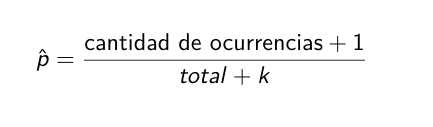

Siendo k la cantidad de clases. Luego, para cada uno de los registros a clasificar, se calcula la probabilidad de que el vector pertenezca a cada una de las posibles clases utilizando la siguiente ecuación:
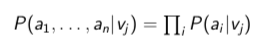
Siendo ai los atributos, V el conjunto de posibles clases. Esta ecuación asume que los valores de los atributos son independientes, dado el valor de la clase. La mayor probabilidad es la que determina la clase en la inferencia como se observa en la siguiente ecuación:
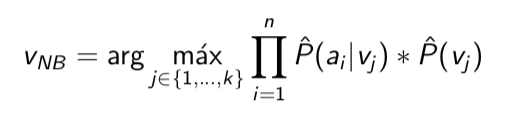
 Donde VNB es la inferencia del clasificador ingenuo de bayes.

In [4]:
from utils.data_loader import load_person_preferences
from bayesian_naive_classifier import bayesian_naive_classifier


titles, training_matrix = load_person_preferences("../data/PreferenciasBritanicos.csv")
print(bayesian_naive_classifier(training_matrix, [[1, 0, 1, 1, 0], [0, 0, 1, 0, 1]], [1, 1, 1, 1, 1]))

['E', 'I']


# *Ejercicio 3* - Clasificador de texto

Clasificador de texto utilizando el clasificador ingenuo de Bayes para el conjunto de datos ”Noticias Argentinas”.

## Selección de categorias
Categorías seleccionadas:
* **Internacional** (3850 noticias)
* **Deportes** (3855 noticias)
* **Ciencia y Tecnologia** (3856 noticias)
* **Economia** (3850 noticias)

**Nota**: se construyo otro archivo en formato CSV que tiene solamente las noticias de las categorías seleccionadas.
La matriz cuenta con el siguiente encabezado: **['fecha', 'titular', 'fuente', 'categoria']**.

Para dividir el conjunto de textos disponible en un conjunto de entrenamiento y otro como conjunto test se utilizo la función `train_test_split` de `sklearn.model_selection` que estratifica las categorias en las división.

## Implementación

Para este caso de uso, al igual que en el ejercicio anterior poseemos una matriz con atributos y con una última columna indicando la clase. Se utilizaron como posibles atributos el titutlar de la noticia y la fuente, y no se utilizo la fecha. Ademas es opcional la fuente, es decir, se puede utilizar solo el titular.

Nuevamente la probabilidad de las clases se aproxima con la frecuencia relativa de las mismas, ordenando la matriz de entrenamiento por clases. Por otra parte, la probabilidad de los atributos dada la clase ya no podía ser calculada de igual forma que en el ejercicio anterior. Entonces, dividamos la oración del titular en palabras y supongamos que cada palabra de una oración es independiente de las demás.

Se implemento una clase llamada `TokenCounter` que permite "tokenizar" (dividir en palabras sin espacios y sin simbolos, pasarlas a minuscula, y la posibilidad de tener un set de palabras ignoradas) los titulares de noticias y almacena internamente un diccionario con las frecuencias de palabras. Se guardo un `TokenCounter` por cada clase y se tokenizo los titulares de los registros de cada clase para el conjunto de entramiento, obteniendo de esta forma la frecuencia relativa de palabras para cada clase. Asumiendo la independencia de palabras, la probabilidad de un titular dada una clase se obtiene por medio de multiplicar las probabilidad de cada palabra dada la clase y esta se aproxima con la frecuencia relativa calculada con el diccionario.

Como los diccionarios son finitos para cada clase, nuevamente utilizamos la corrección de Laplace para evitar el problema de probabilidad cero. Finalmente, para las fuentes se se normalizan a minuscula y se obtiene la frecuencia relativa de fuente por clase, siendo opcional clasificar ademas del texto del titular también la fuente de la noticia.


In [11]:
import numpy as np
from utils.data_loader import load_transformed_news_dataset
from models.news_classifier import NewsClassifier
from sklearn.model_selection import train_test_split


titles, news_data = load_transformed_news_dataset("../data/transformed_news.tsv")
train_matrix = news_data[:, :3]
categories = news_data[:, 3]
training_news, test_news, training_target, test_target = train_test_split(train_matrix, categories, train_size=0.8,
                                                                          stratify=categories)

news_classifier = NewsClassifier()
extra_column = training_target.reshape(len(training_target), 1)
training_news = np.append(training_news, extra_column, axis=1)
news_classifier.train(training_news, ignore_words=True)

inference_example = [['2018-11-20 18:08:00', 'Messi abandona el barcelona', 'ESPN']]
inference_example.append(['2018-11-20 18:08:00', 'El mensaje del Banco Central sobre los dólares en el colchón puso tenso a los inversores', 'Infobae'])
result = news_classifier.classify(np.asarray(inference_example))
print(result)

['Deportes', 'Economia']


## Matriz de confusión

* Nos permite ver el desempeño de este algoritmo de aprendizaje supervisado.


* Nos permite ver si se confunden clases de noticias.


* Se grafica un mapa de calor para la matriz de confusión multiclase de la clasificación de noticias del conjunto de testeo

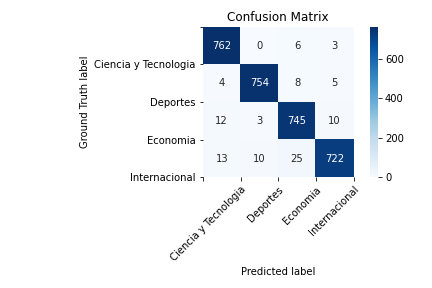

## Métricas de evaluación 

Las metricas se calculan haciendo uso de la matriz de confunsión y tanto la matriz, como las métricas listadas a continuación y la generación de puntos y curvas ROC se engloban en la clase `ClassifierMetrics` que es una clase que provee estas prestaciones a un clasificador dado.

*  **El error estimado del Método de clasificación**


*  **El error estimado relativo del Método de clasificación**


* **Accuracy** = (TP + TN) / (TP + TN + FP + FN)


* **Precision** = TP / (TP + FP)


* **Tasa de verdaderos positivos (TP Rate)** = **Recall**


* **Tasa de falsos positivos (FP Rate)**


* **Fn-Score** = (1 + n^2) * precision * recall / (n^2 * precision + recall)


* **F1-Score** = 2*precision * recall / (precision + recall)


* **Matthews Correlation Coefficient (MCC)** = (TP * TN - FP * FN) / ( (TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))^(1/2)



In [2]:
import numpy as np
from utils.data_loader import load_transformed_news_dataset
from models.news_classifier import NewsClassifier
from sklearn.model_selection import train_test_split

titles, news_data = load_transformed_news_dataset("../data/transformed_news.tsv")
train_matrix = news_data[:, :3]
categories = news_data[:, 3]
training_news, test_news, training_target, test_target = train_test_split(train_matrix, categories, train_size=0.8,
                                                                          stratify=categories)
news_classifier = NewsClassifier()
extra_column = training_target.reshape(len(training_target), 1)
training_news = np.append(training_news, extra_column, axis=1)
news_classifier.train(training_news, ignore_words=True)
result, metrics = news_classifier.classify(test_news, test_target, generate_metrics=True, output_path="../output",
                                           use_sources=False, ignore_words=False)
print("Error estimado del Método de clasificación: {}\n\n".format(metrics.estimated_classifier_error))
print("Error estimado relativo del Método de clasificación: {}\n\n".format(metrics.estimated_classifier_error_relative))
print("Tasa de verdaderos positivos (TP Rate): {}\n\n".format(metrics.true_positives_rate))
print("Tasa de falsos positivos (FP Rate): {}\n\n".format(metrics.false_positives_rate))
print("Recall: {}\n\n".format(metrics.recall))
print("Accuracy: {}\n\n".format(metrics.accuracy))
print("Precision: {}\n\n".format(metrics.precision))
print("F1-Score: {}\n\n".format(metrics.f1_score))
print("MCC: {}".format(metrics.matthews_correlation_coefficient))

Error estimado del Método de clasificación: 86


Error estimado relativo del Método de clasificación: 0.027903958468526932


Tasa de verdaderos positivos (TP Rate): {'Ciencia y Tecnologia': 0.9909208819714657, 'Deportes': 0.9766536964980544, 'Economia': 0.961038961038961, 'Internacional': 0.9597402597402598}


Tasa de falsos positivos (FP Rate): {'Ciencia y Tecnologia': 0.009519688446559932, 'Deportes': 0.006057983556901774, 'Economia': 0.012975778546712802, 'Internacional': 0.00865051903114187}


Recall: {'Ciencia y Tecnologia': 0.9909208819714657, 'Deportes': 0.9766536964980544, 'Economia': 0.961038961038961, 'Internacional': 0.9597402597402598}


Accuracy: {'Ciencia y Tecnologia': 0.990590525632706, 'Deportes': 0.9896171317326411, 'Economia': 0.9805321219987021, 'Internacional': 0.9834523036988968}


Precision: {'Ciencia y Tecnologia': 0.9720101781170484, 'Deportes': 0.9817470664928292, 'Economia': 0.961038961038961, 'Internacional': 0.9736495388669302}


F1-Score: {'Ciencia y Tecno

## Curva ROC (Receiver Operating Characteristics)

* Se obtienen los puntos ROC para cada clase. **Punto ROC = (FP Rate, TP Rate)**


* Se grafican curvas ROC para cada clase.


* Se calcula el **AUC**: area debajo de la curva ROC

El **espacio ROC** es un cuadrado **[0, 1] × [0, 1]**, el eje x representa la  tasa de falsos positivos y en el eje y la tasa de verdaderos positivos.
Una curva ROC se crea conectando todos los puntos ROC de un clasificador en el espacio ROC. Se pueden conectar dos puntos ROC adyacentes mediante una línea recta, y la curva comienza en **(0.0, 0.0)** y termina en **(1.0, 1.0)**.

**NOTA**: para calcular el área debajo de la curva ROC se utilizó el método de integráción numérica conocido como el método de los trapecios.

In [9]:
import numpy as np
from utils.data_loader import load_transformed_news_dataset
from models.news_classifier import NewsClassifier
from sklearn.model_selection import train_test_split

titles, news_data = load_transformed_news_dataset("../data/transformed_news.tsv")
train_matrix = news_data[:, :3]
categories = news_data[:, 3]
training_news, test_news, training_target, test_target = train_test_split(train_matrix, categories, train_size=0.8,
                                                                          stratify=categories)
news_classifier = NewsClassifier()
extra_column = training_target.reshape(len(training_target), 1)
training_news = np.append(training_news, extra_column, axis=1)
news_classifier.train(training_news, ignore_words=True)
result, metrics = news_classifier.classify(test_news, test_target, generate_metrics=True, output_path="../output",
                                           use_sources=False, ignore_words=False)

print("Puntos ROC: {}".format(metrics.roc_point))

Puntos ROC: {'Ciencia y Tecnologia': (0.0099524015577672, 0.9883268482490273), 'Deportes': (0.004327131112072695, 0.9870298313878081), 'Economia': (0.010813148788927335, 0.974025974025974), 'Internacional': (0.005622837370242215, 0.9584415584415584)}


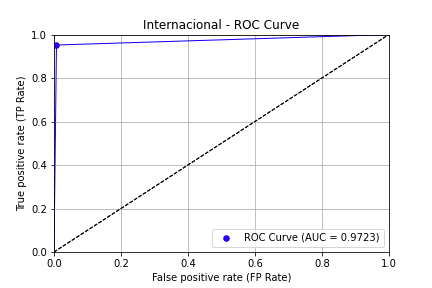

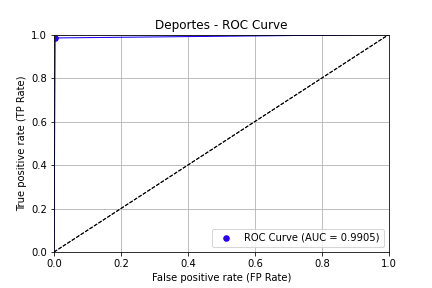

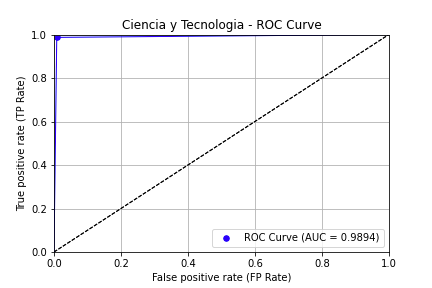

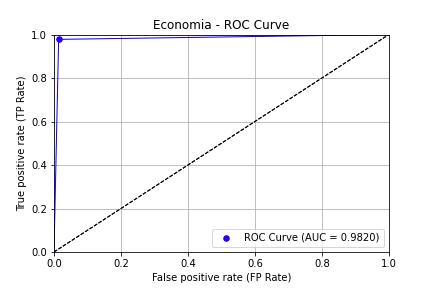

# *Ejercicio 4* - Red Bayesiana: admisión universidades
El conjunto de datos **binary.csv** contiene información de la admisión de estudiantes a una universidad.

Las variables son:

*   **admit**: toma valores 0: no fue admitido, 1 fue admitido
*   **GRE (Graduate Record Exam scores)**: variable numérica
*   **GPA (Grade Point Average)**: variable numérica
*   **rank**: variable categórica que se refiere al prestigio de la escuela secundaria a la que el alumno asistió y toma valores {1, 2, 3, 4}.

Un investigador está interesado en averiguar cómo influyen estas variables en la admisión. Discretiza las variables GRE y GPA de la siguiente manera GRE ∈ {GRE ≥ 500,GRE < 500} y GPA ∈ {GPA ≥ 3,GPA < 3}. Sabe que estas variables cumplen las relaciones presentadas en la **Figura 1**.


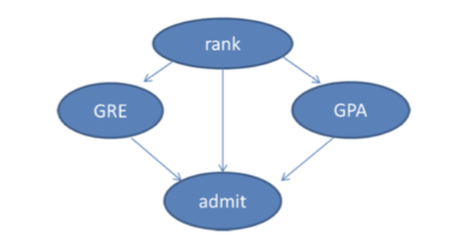
                                **Figura 1**: Relaciones entre las variables

## Implementación

### Implementación del DAG

Para la implementacion del grafo aciclico dirigido se implemento la clase Node
```
Node {
    name,
    parents,
    children,
    values,
    conditional_probabilities
    }
```

Donde 
 * `name`: es el nombre que va a representar al nodo para nuestro caso son los nombres de las variables.
 * `children`: es un mapa con los nombres de los hijos como clave y el nodo hijo como valor.
 * `parents`: es un mapa con el nombre del nodo padre como clave y el nodo padre como valor.
 * `conditional_probabilites`: es un mapa que representa la tabla de probabilidades condicionales asociadas al nodo. 
 Este mapa tiene como clave un string generado a partir de los valores de sus padres y el suyo y como valor tiene la 
 probabilidad asociada a dichos valores. Mas adelante se explicara el proceso de generacion de dichas claves.

### Generalizacion de la Red Bayesiana

La red bayesiana se crea de la siguiente manera:
```
    BayesianNetwork(data_relations, data_set, titles)
```

Donde:
* `data_relations`: es un array de arrays donde cada subarray representa un nodo y tiene en la primer posicion el nombre del nodo, 
en la segunda posicion un array formado por los nombres de los nodos hijos del nodo actual y en la tercera posicion un
array con los valores posibles del nodo. De esta manera puede generalizarse la red
    * Ej: para crear la red del ejercicio *data_relations* es:
    ```
        data_relations = [["rank", ["admit", "gre", "gpa"], [1, 2, 3, 4]], ["gpa", ["admit"], [0, 1]],
                          ["gre", ["admit"], [0, 1]], ["admit", [], [0, 1]]]
    ```
* `data_set`: es la matriz con los datos utilizados para calcular la tabla de probabilidad condicional de cada nodo (proveniente de la discretización del dataset utilizado).
* `titles`: es un array con los nombres de las variables y su orden se corresponde con el orden de las columnas de *data_set*

### Generacion  de claves para la tabla de proabilidad condicional

Dado un nodo se sabe que para cada probabilidad condicional tanto él, como cada uno de sus padres, tendra un valor especifico.
De esa manera se implementó un algoritmo utilizando backtracking el cual recibe todas las variables que participan en 
la probabilidad y generaba un string que representa una clave para cada permutacion posible de los valores de las variables asociadas. Con el objetivo de que la clave sea única, las variables estan ordenadas alfabeticamente en el string generado.
Veamos un ejemplo, si se quiere generar la clave para **rank = 4**, **admit = 0**, **gre = 0**, **gpa = 1** la clave
resultante es `admit-0,gpa-1,gre-0,rank-4`.

Para ejemplificar también como se utilizan estas claves en el mapa de probabilidades condicionales de los nodos, pongamos de ejemplo el nodo **admit**:

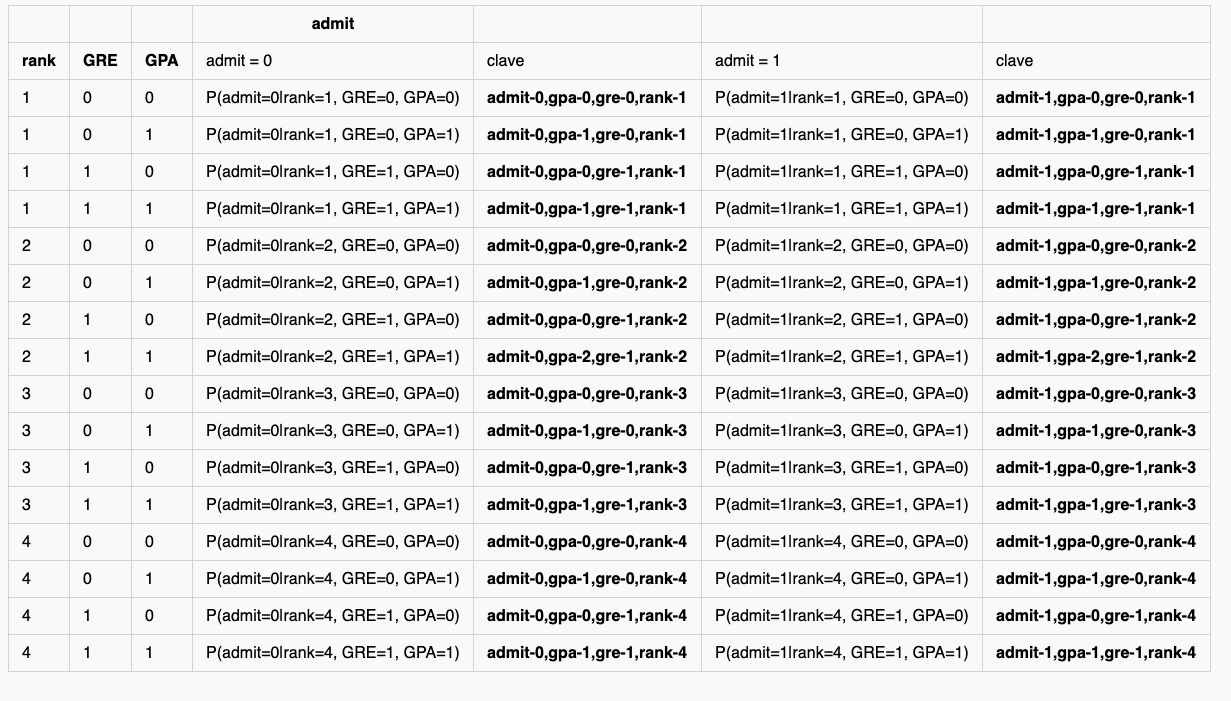

* Calcular la probabilidad de que una persona que proviene de una escuela con rango 1 no haya sido admitida en la universidad.

**P(admit = 1 | rank = 1)**

Aplicamos la definición de probabilidad condicional y luego el teorema de la probabilidad total y obtenemos:

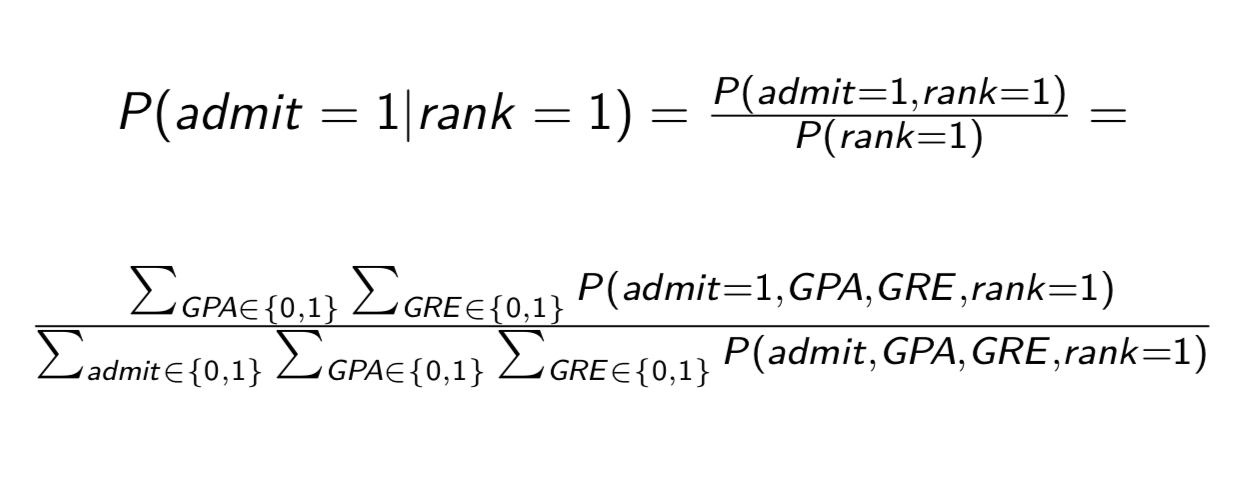

Para cada uno de los terminos de la expresión anterior calculamos la probabilidad conjunta via el teorema de la factorización de la probabilidad como se observa a continuación:

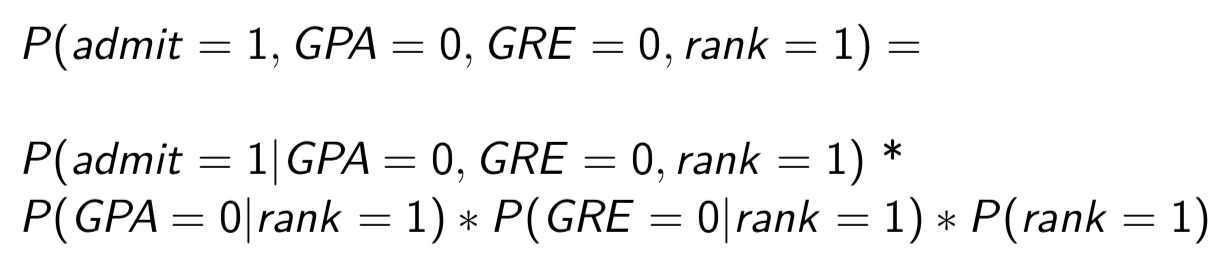

* Calcular la probabilidad de que una persona que fue a una escuela de rango 2, tenga GRE = 450 y GPA = 3.5 sea admitida en la universidad.

**P(admit = 1 | rank = 2, GRE = 450, GPA = 3.5)**


In [10]:
from models.bayesian_network import BayesianNetwork
from utils.data_loader import load_binary_dataset, discretize_binary_dataset

titles, matrix = load_binary_dataset("../data/binary.csv")
matrix = discretize_binary_dataset(titles, matrix)
data_relations = [["rank", ["admit", "gre", "gpa"], [1, 2, 3, 4]], ["gpa", ["admit"], [0, 1]],
                  ["gre", ["admit"], [0, 1]], ["admit", [], [0, 1]]]
bayesian_network = BayesianNetwork(data_relations, matrix, titles)

probability = bayesian_network.calculate_total_generic_conditional_probability(["rank", "admit"], [1, 1], ["rank"], [1])
print("P(admit = 1 | rank = 1) = {}".format(probability))
probability = bayesian_network.calculate_total_generic_conditional_probability(["rank", "gre", "gpa", "admit"],
                                                                               [2, 0, 1, 1], ["rank", "gre", "gpa"],
                                                                               [2, 0, 1])
print("P(admit = 1 | rank = 2, GRE = 450, GPA = 3.5) = {}".format(probability))


P(admit = 1 | rank = 1) = 0.5517631529323024
P(admit = 1 | rank = 2, GRE = 450, GPA = 3.5) = 0.2173913043478261
